### Selected Innovation

I chose **Affirm’s Debit Card** as the innovation because it offers a flexible and consumer-friendly alternative to traditional credit cards by allowing users to either pay immediately or choose an installment plan with no hidden fees or interest. This aligns with the growing trend of **Buy Now, Pay Later (BNPL)** services, which provide a more transparent and accessible payment method. Affirm's integration with Apple Pay and its partnerships with major retailers make it a convenient choice for modern consumers, and its growing popularity in the U.S. market demonstrates its potential to disrupt traditional credit systems.

### Similar Innovation From The Past

I chose **Klarna** as the past similar innovation because it is one of the leading companies in the **Buy Now, Pay Later (BNPL)** sector, offering similar services to Affirm. Klarna allows users to make purchases and pay over time with flexible payment options and no interest or hidden fees, making it a strong competitor in the BNPL market.

### Comparison in terms of their functionality, technology, or market impact

Both offer consumers a way to make purchases and pay for them later without the burden of interest or late fees. Affirm's Debit Card allows users to either pay upfront or use the app to choose a payment plan, providing a flexible and consumer-friendly alternative to traditional credit cards. Similarly, Klarna has been offering **flexible payment** solutions for several years, enabling customers to shop now and pay later, which is very popular in both the U.S. and European markets. Both innovations use **technology** to make shopping easier by integrating with digital payment systems like Apple Pay and focusing on providing a seamless user experience.

In terms of market impact, both Affirm and Klarna have had a significant **influence on the payments industry**, especially as more consumers seek alternative payment methods to credit cards. According to a Statista report, Klarna reached over [**111 million**](https://www.klarna.com/international/about-us/) users globally, showing the growing demand for BNPL services. Affirm, with its partnerships with major retailers, has seen strong growth and increased its **market share** in the U.S. Both innovations are reshaping the way people think about credit and payments, offering a simpler, more transparent solution to borrowing money. This trend is expected to grow, especially as consumers increasingly prefer the flexibility and lower fees that these services offer compared to traditional credit options like credit cards.


### Selected datasets:

I chose the Klarna App Downloads by Country over Time  for applying **the Bass Diffusion Model**. The download data provides insights into user growth over time, which is necessary for estimating the new adopters and cumulative adopters in the Bass Model.

The dataset can be found here:
- https://www.statista.com/statistics/1327615/klarna-app-downloads-by-country/

As the dataset included data across many countries, I decided to keep it just worldwide. That's why I provided a dataset that is an adjusted version of the original one (which is provided as well). So, this dataset has 2 columns: Month and Number of Downloads Worldwide.

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\Users\milli\Documents\klarna_monthly_downloads.xlsx"
klarna_data = pd.read_excel(file_path)
klarna_data.head()

,Month,Number of Downloads Worldwide
0,Jan 2018,253657
1,Feb 2018,201656
2,Mar 2018,191752
3,Apr 2018,188566
4,May 2018,0


In [3]:
# converting 'Month' to datetime format
klarna_data['Month'] = pd.to_datetime(klarna_data['Month'], format='%b %Y')

In [4]:
# calculation of cumulative downloads
klarna_data['Cumulative Downloads'] = klarna_data['Number of Downloads Worldwide'].cumsum()

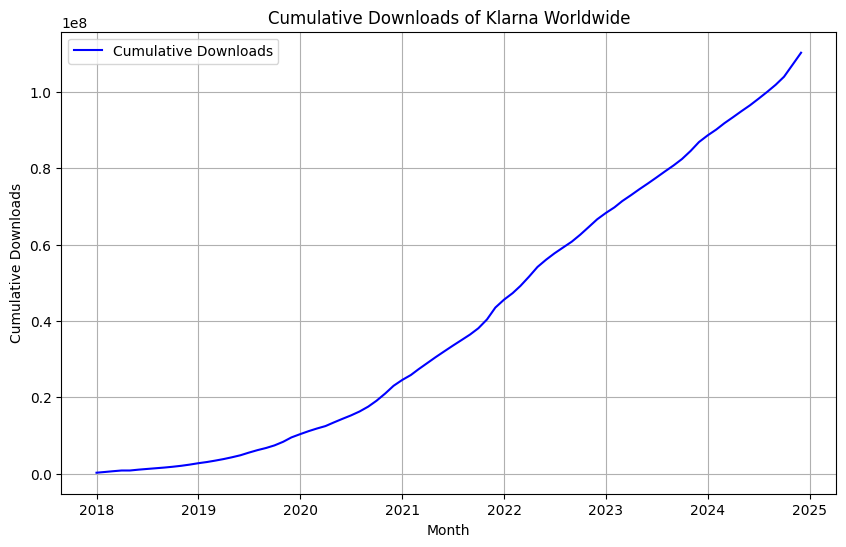

In [5]:
# cumulative downloads to visualize the adoption curve
plt.figure(figsize=(10, 6))
plt.plot(klarna_data['Month'], klarna_data['Cumulative Downloads'], label='Cumulative Downloads', color='blue')
plt.xlabel('Month')
plt.ylabel('Cumulative Downloads')
plt.title('Cumulative Downloads of Klarna Worldwide')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the cumulative downloads of Klarna worldwide from 2018 to 2025. The blue line represents the total number of downloads over time, showing a steady increase in adoption. The curve indicates that Klarna’s adoption is accelerating, with more downloads happening as time progresses. This growth suggests that the service has been gaining popularity over the years.

In [6]:
def bass_model(t, p, q, M):
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

In [7]:
time_steps = np.arange(len(klarna_data))  # Time steps from 0 to len(klarna_data)-1
observed_adoption = klarna_data['Cumulative Downloads'].values

In [8]:
# we just fit the Bass model to the cumulative adoption data
params, covariance = curve_fit(bass_model, time_steps, observed_adoption, p0=[0.03, 0.38, max(observed_adoption)])

In [9]:
p, q, M = params

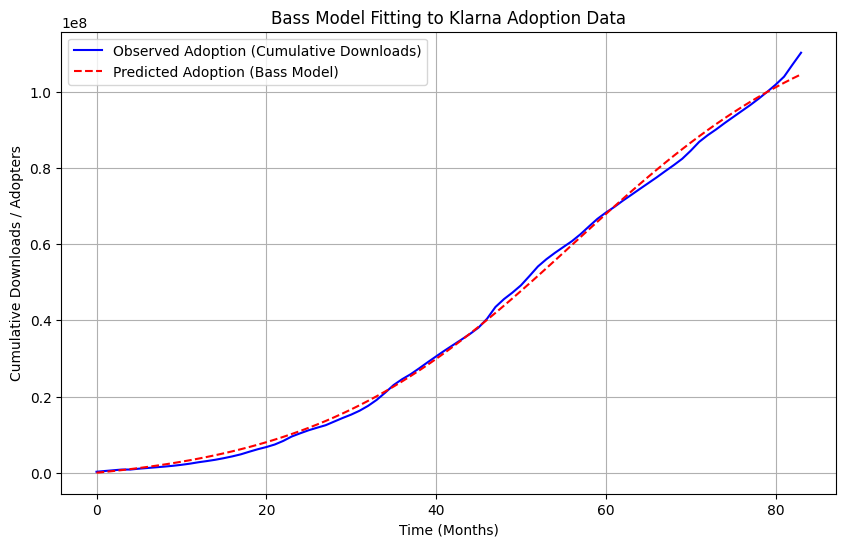

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(time_steps, observed_adoption, label="Observed Adoption (Cumulative Downloads)", color='blue')
plt.plot(time_steps, bass_model(time_steps, *params), label="Predicted Adoption (Bass Model)", color='red', linestyle='--')
plt.xlabel('Time (Months)')
plt.ylabel('Cumulative Downloads / Adopters')
plt.title('Bass Model Fitting to Klarna Adoption Data')
plt.legend()
plt.grid(True)
plt.show()

The plot shows the cumulative downloads of Klarna worldwide and how well the Bass Model fits the observed adoption data. The blue line represents the actual cumulative downloads of Klarna over time, and the red dashed line represents the predicted cumulative adoption based on the Bass Model parameters. The plot demonstrates that the red dashed line follows the blue line closely, indicating that the Bass Model has been able to capture the overall adoption trend of Klarna effectively. The slight differences between the two lines suggest that while the Bass Model can model the general trend of adoption well, it may not capture every minor fluctuation perfectly. This comparison is valuable for applying the same model to forecast future adoption for Affirm based on Klarna's historical data.

In [11]:
p, q, M

(np.float64(0.0017013278075477644),
 np.float64(0.06224192659436234),
 np.float64(124104429.59653838))

The estimated parameters for **The Bass Diffusion Model** are:

**Coefficient of Innovation (p):** 0.0017

**Coefficient of Imitation (q):** 0.0622

**Market Potential (M):** 124,104,429.7

**p (Innovation Coefficient):** This parameter represents the rate at which innovators adopt the product. A low value (like 0.0017) suggests that the innovation is spreading slowly at first.

**q (Imitation Coefficient):** This parameter represents the rate at which imitators (people who adopt based on the behavior of others) adopt the product. A higher value (like 0.0622) indicates that social influence plays a significant role in the adoption process.

**M (Market Potential):** This is the estimated total number of adopters (or the market size), and it is calculated to be around 124 million downloads, which is the upper limit for the adoption process.

C:\Users\milli\AppData\Local\Temp\ipykernel_20416\1909542147.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_months = pd.date_range(start=klarna_data['Month'].max(), periods=forecast_years * 12 + 1, freq='M')[1:]  # Exclude the first month (already included)


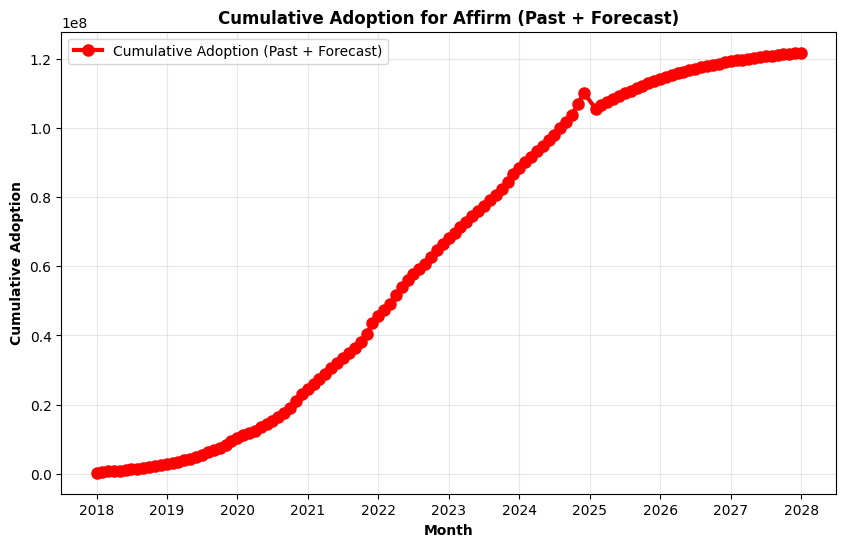

In [12]:
# Forecast the adoption for the next 3 years (36 months)
forecast_years = 3
forecast_time_steps = np.arange(len(klarna_data), len(klarna_data) + forecast_years * 12)  # 36 months forecast

# Predict cumulative adoption for Affirm using the Bass model parameters from Klarna
predicted_cumulative_adoption = bass_model(forecast_time_steps, p, q, M)

# Combine historical and forecasted data
forecast_months = pd.date_range(start=klarna_data['Month'].max(), periods=forecast_years * 12 + 1, freq='M')[1:]  # Exclude the first month (already included)
combined_months = pd.concat([klarna_data['Month'], pd.Series(forecast_months)], ignore_index=True)
combined_cumulative_adoption = np.concatenate([klarna_data['Cumulative Downloads'].values, predicted_cumulative_adoption])

# Create a DataFrame for combined data (historical + forecasted)
forecast_df = pd.DataFrame({
    'Month': combined_months,
    'Cumulative_Adoption': combined_cumulative_adoption
})

# Plot the results: Cumulative Adoption (Past + Forecast)
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Month'], forecast_df['Cumulative_Adoption'], 'o-', label='Cumulative Adoption (Past + Forecast)', linewidth=3, markersize=8, color='red')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Cumulative Adoption', fontweight='bold')
plt.title('Cumulative Adoption for Affirm (Past + Forecast)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The plot shows the cumulative adoption for Affirm (combining both historical and forecasted data). The red line represents the total cumulative adoption over time, which begins from 2018 and continues into the forecasted future (until 2028).

**Interpretation:**

The x-axis represents time (in months) from 2018 to 2028.

The y-axis represents the cumulative adoption, likely measured in total downloads or adopters.

The data points for the historical period (2018 to 2024) reflect actual cumulative adoption, while the points for 2025 onward represent the forecasted cumulative adoption based on the Bass Model.

The plot shows a steady acceleration in adoption, followed by a sharp increase in forecasted adoption, which is expected based on the Bass Model's behavior when the market starts reaching saturation. This aligns with the general S-curve nature of adoption in the Bass Diffusion Model.

# 6

I chose to analyze the diffusion of Affirm on a global scale because Affirm, similar to its competitor Klarna, operates in multiple countries and has a broad international presence (as you can see in original dataset). The service offers "buy now, pay later" solutions to customers worldwide, so understanding how the innovation spreads globally would give a more comprehensive picture of its overall adoption.

When we focus on global adoption, we can account for a wide range of factors that influence adoption in different countries, such as the general trend of the increasing use of online shopping, the growth of fintech and so on. These factors are growing rapidly not just in the U.S. but in other regions too. 

Using a global scope also allows us to gather more **comprehensive data** on adoption trends across different markets. While specific cultural or regulatory factors may influence adoption in particular regions, the overall global diffusion of such technologies is important to understand. We can look at adoption rates in different countries, how fintech is growing in regions outside of North America, and how different markets are reacting to BNPL services like Affirm.

By analyzing the global diffusion path, we can not only estimate the future of Affirm in established markets but also predict its growth in **emerging markets**, where adoption is still at early stages but showing significant potential. This broad perspective will ensure that the predictions are relevant to all markets where Affirm has a presence or plans to expand, providing a more complete picture of its future growth.

## 7

C:\Users\milli\AppData\Local\Temp\ipykernel_20416\1273588233.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_months = pd.date_range(start=klarna_data['Month'].max(), periods=end_time + 1, freq='M')[1:]  # Exclude the first month (already included)


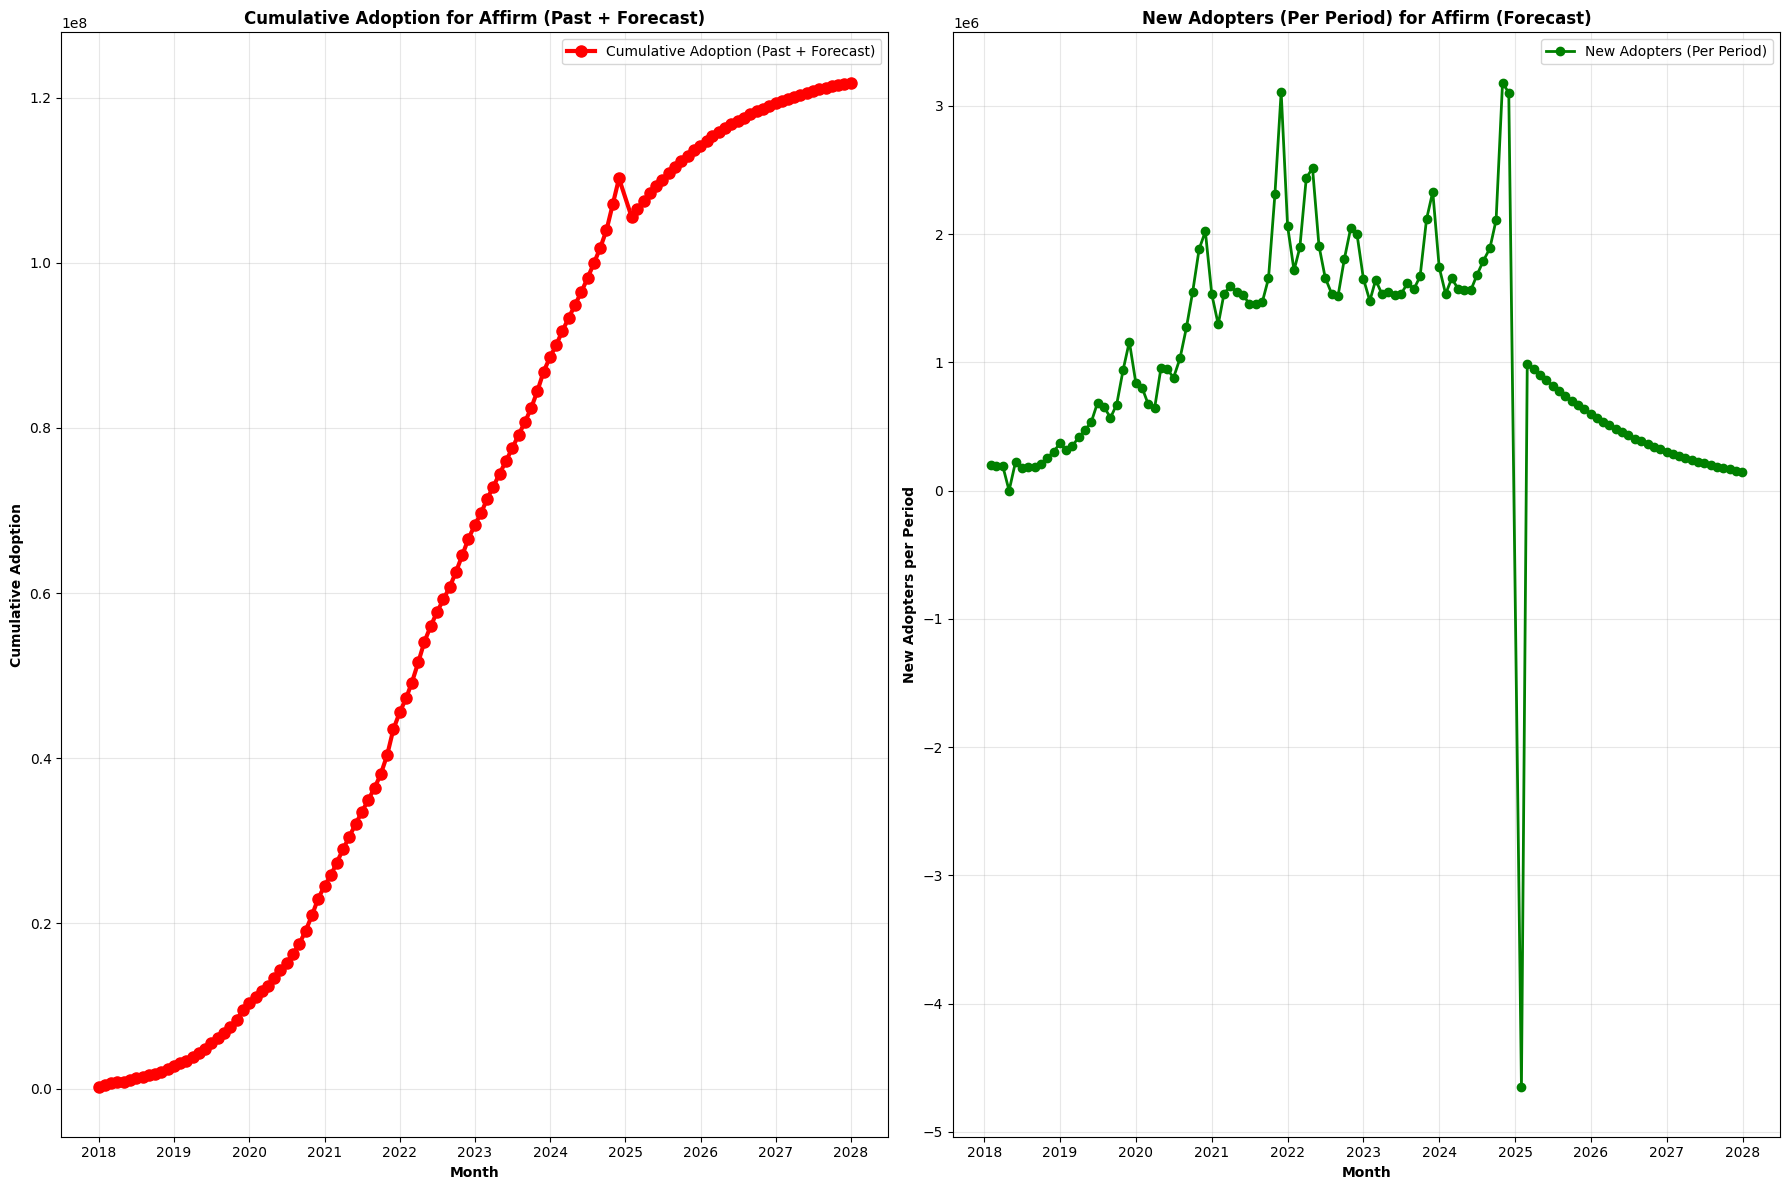

In [13]:
# Forecast period (3 years after December 2024)
forecast_years = 3
start_time = len(klarna_data)  # Start time is the last month of the historical data
end_time = forecast_years * 12  # Forecast for 3 years (36 months)

# Time periods (in months) for the forecast
forecast_time_steps = np.arange(start_time, start_time + end_time)

# Forecast the cumulative adoption using the Bass model
predicted_cumulative_adoption = bass_model(forecast_time_steps, p, q, M)

# Calculate the new adopters for each period (monthly)
new_adopters_forecast = np.diff(predicted_cumulative_adoption, prepend=0)  # New adopters per month

# Combine historical and forecasted data
forecast_months = pd.date_range(start=klarna_data['Month'].max(), periods=end_time + 1, freq='M')[1:]  # Exclude the first month (already included)
combined_months = pd.concat([klarna_data['Month'], pd.Series(forecast_months)], ignore_index=True)
combined_cumulative_adoption = np.concatenate([klarna_data['Cumulative Downloads'].values, predicted_cumulative_adoption])

# Create a DataFrame for combined data
forecast_df = pd.DataFrame({
    'Month': combined_months,
    'Cumulative_Adoption': combined_cumulative_adoption
})

# Calculate the new adopters for the forecast period
new_adopters_forecast_combined = np.diff(forecast_df['Cumulative_Adoption'], prepend=0)

# Visualize the results: Cumulative Adoption and New Adopters
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# Plot 1: Cumulative Adoption (Past + Forecast)
axes[0].plot(forecast_df['Month'], forecast_df['Cumulative_Adoption'], 'o-', label='Cumulative Adoption (Past + Forecast)', linewidth=3, markersize=8, color='red')
axes[0].set_xlabel('Month', fontweight='bold')
axes[0].set_ylabel('Cumulative Adoption', fontweight='bold')
axes[0].set_title('Cumulative Adoption for Affirm (Past + Forecast)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: New Adopters (Period Adoption)
axes[1].plot(forecast_df['Month'][1:], new_adopters_forecast_combined[1:], 'o-', label='New Adopters (Per Period)', linewidth=2, markersize=6, color='green')
axes[1].set_xlabel('Month', fontweight='bold')
axes[1].set_ylabel('New Adopters per Period', fontweight='bold')
axes[1].set_title('New Adopters (Per Period) for Affirm (Forecast)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

# Show the plot
plt.show()